In the following, we investigate the role of the metric in distinguishing between measure preserving automorphisms of the unit cube.

In [1]:
import numpy as np
from jax.scipy import special

In [2]:
from plotting import cart2pol, scatterplot_variables

In [3]:
# Implement the construction in Francesco's paper, maybe based on appendix D.1 in Ilyes' paper;

from mixing_functions import build_automorphism

# TO DO: Implement the construction in section 2.2 of Aapo's paper

In [4]:
import jax
from jax import numpy as np
from jax import vmap
from jax import jacfwd

from jax import random
key = random.PRNGKey(42)

import numpy as onp

from metrics import aDM

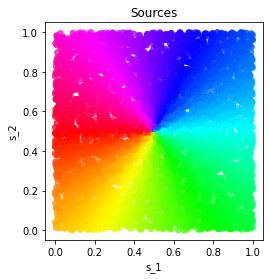

In [5]:
# N:=Number of samples
N = 6000
# D:=Number of dimensions
D = 2


# Generate the samples
S = random.uniform(key, shape=(N, D), minval=0.0, maxval=1.0)

_, phi = cart2pol( S[:,0]-0.5, S[:,1]-0.5)

colors = phi

scatterplot_variables(S, 'Sources', colors=colors)

In [6]:
key+=1

In [7]:
from scipy.stats import ortho_group # Requires version 0.18 of scipy

A = ortho_group.rvs(dim=2)

f, g = build_automorphism(A)

In [8]:
f_batched = vmap(f)
X = f_batched(S)

In [9]:
X

DeviceArray([[0.12334242, 0.63249815],
             [0.9198904 , 0.90834767],
             [0.75518864, 0.5470831 ],
             ...,
             [0.23138034, 0.5422231 ],
             [0.20033547, 0.8733428 ],
             [0.81647587, 0.07595277]], dtype=float32)

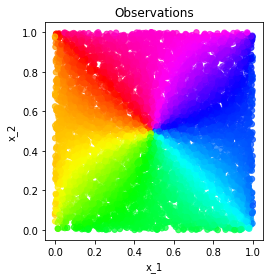

In [10]:
scatterplot_variables(X, 'Observations', colors=colors)

In [11]:
Jf, Jg = jacfwd(f), jacfwd(g)
Jf_batched, Jg_batched = vmap(Jf), vmap(Jg)

In [12]:
aDM(Jf_batched, S)

DeviceArray(0.30032748, dtype=float32)

Thank god it is bigger than zero.

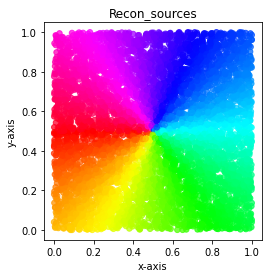

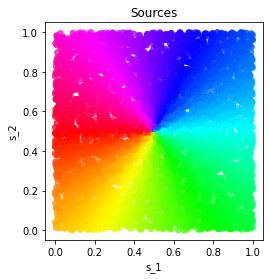

In [13]:
g_batched = vmap(g)
Y = g_batched(X)
scatterplot_variables(Y, 'Recon_sources', colors=colors)
scatterplot_variables(S, 'Sources', colors=colors)